### Authentication to Google Drive Files

In [ ]:
# Code to read csv file into Colaboratory:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
# Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

### Importing Libraries

In [ ]:
import pandas as pd
import re
import nltk
nltk.download('punkt')
from nltk.tokenize import word_tokenize
from nltk import pos_tag
nltk.download('stopwords')
nltk.download('omw-1.4')
from nltk.corpus import stopwords
nltk.download('wordnet')
from nltk.corpus import wordnet
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import sent_tokenize, word_tokenize
nltk.download('averaged_perceptron_tagger')
from collections import Counter
import matplotlib.pyplot as plt
%matplotlib inline
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
import numpy as np
import spacy
nlp = spacy.load('en_core_web_sm', disable=['parser', 'ner'])

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
/usr/local/lib/python3.7/dist-packages/spacy/language.py:1899: UserWarning: [W123] Argument disable with value ['parser', 'ner'] is used instead of ['senter'] as specified in the config. Be aware that this might affect other components in your pipeline.
  config_value=config["nlp"][key],


### Joining monthly tweet files downloaded

In [ ]:
# Filename: March tweets
# link = 'https://drive.google.com/file/d/129hoZzm2WZhKJMgbW1TIWFR4XmjxPW2Y/view?usp=share_link
id = '129hoZzm2WZhKJMgbW1TIWFR4XmjxPW2Y'


In [ ]:
downloaded = drive.CreateFile({'id':id}) 
downloaded.GetContentFile('March.csv',)  
# Dataset is now stored in a Pandas Dataframe
data1 = pd.read_csv('March.csv')
data1

,author_id,username,author_location,text,created_at,tweet_location,retweets,replies,likes,quote_count
0,712000889427521537,community001500,"Bristol, England",RT @StrikeMapUK: The Cost of Living Crisis is ...,2022-03-30 23:56:24+00:00,NaN,48,0,0,0
1,1242068059088728065,dmm251144,"South East, England",RT @0Calamity: This is not a #CostOfLivingCris...,2022-03-30 23:56:01+00:00,NaN,44,0,0,0
2,1198201693550366722,AOnewith,Oxford UK,RT @peteduncan: #BorisJohnson https://t.co/jPu...,2022-03-30 23:54:33+00:00,NaN,11,0,0,0
3,1446522814727692320,Xaraptor,"Left of Centre, Brexshit Isle",#CostOfLivingCrisis #JohnsonOut66 https://t.co...,2022-03-30 23:53:10+00:00,NaN,0,0,0,0
4,1096476603444576260,AngelaCookson4,"Bilsborrow,Lancashire",RT @pelepele1: ‘All guidance was followed’ ...,2022-03-30 23:52:18+00:00,NaN,94,0,0,0
...,...,...,...,...,...,...,...,...,...,...
171223,236875405,Treensy2,Belfast N Ireland,RT @Anna_Soubry: To journalists in Poland &amp...,2022-03-01 00:02:22+00:00,NaN,1896,0,0,0
171224,1231930773151866882,Catheri76130871,"Gullane, Scotland",RT @Anna_Soubry: To journalists in Poland &amp...,2022-03-01 00:02:09+00:00,NaN,1896,0,0,0
171225,1172668611502235649,rapz90,United Kingdom,#Tiktok #ForYou #fypシ #BorisJohnson #Putin \n....,2022-03-01 00:02:02+00:00,NaN,8,0,12,0
171226,1348515222,caveman4107,Monk Sherborne,Johnson is an idiot and the sooner he is gone ...,2022-03-01 00:02:01+00:00,NaN,0,0,0,0


In [ ]:
# Filename: April tweets
# link = 'https://drive.google.com/file/d/1BcTzJgWuMBgetH2mG6Dzvvq_CyBJruzQ/view?usp=share_link
id = '1BcTzJgWuMBgetH2mG6Dzvvq_CyBJruzQ'

In [ ]:
downloaded = drive.CreateFile({'id':id}) 
downloaded.GetContentFile('April.csv',)  
# Dataset is now stored in a Pandas Dataframe
data2 = pd.read_csv('April.csv')
data2

,author_id,username,author_location,text,created_at,tweet_location,retweets,replies,likes,quote_count
0,1441822823823994880,teresa_woollard,Manchester,RT @AndrewOJ21MPP: if proper sentence's were t...,2022-04-29 23:59:49+00:00,NaN,1,0,0,0
1,327529196,alishankhan1,"New Delhi, India",RT @sajournal1: British MP @zarahsultana raise...,2022-04-29 23:59:49+00:00,NaN,637,0,0,0
2,1081484761934319623,LadyJules_Cath,"Surrey, United Kingdom",RT @iPinkLadyy: @GOV2UK #CostOfLivingCrisis br...,2022-04-29 23:58:59+00:00,NaN,13,0,0,0
3,1061700198,AngelLady75,"Bedford, UK",@ThatTimWalker If there's another loo roll sho...,2022-04-29 23:58:31+00:00,NaN,2,0,1,0
4,2714465297,MccreadyGlenn,North By Northwest,RT @iPinkLadyy: @GOV2UK #CostOfLivingCrisis br...,2022-04-29 23:57:54+00:00,NaN,13,0,0,0
...,...,...,...,...,...,...,...,...,...,...
238427,1138075224,DavidDouglasH,NaN,@BBCPolitics @bbclaurak Will Smiths wife isn’t...,2022-04-01 00:01:35+00:00,NaN,0,0,0,0
238428,1081484761934319623,LadyJules_Cath,"Surrey, United Kingdom",RT @cathyq101_q: @GOV2UK Putin's paid for Brex...,2022-04-01 00:01:34+00:00,NaN,28,0,0,0
238429,498140957,dodgeyboiler,South East,RT @cathyq101_q: @GOV2UK Putin's paid for Brex...,2022-04-01 00:01:22+00:00,NaN,28,0,0,0
238430,20796457,Awarding_Women,"London, England",RT @iPinkLadyy: @GOV2UK This man needs to go…\...,2022-04-01 00:00:12+00:00,NaN,18,0,0,0


In [ ]:
# Filename: May tweets
# link = 'https://drive.google.com/file/d/1ofsWxEHrB110vOTl88jVqea2DwGtSbRN/view?usp=share_link
id = '1ofsWxEHrB110vOTl88jVqea2DwGtSbRN'

In [ ]:
downloaded = drive.CreateFile({'id':id}) 
downloaded.GetContentFile('May.csv',)  
# Dataset is now stored in a Pandas Dataframe
data3 = pd.read_csv('May.csv')
data3

,author_id,username,author_location,text,created_at,tweet_location,retweets,replies,likes,quote_count
0,2233626266,ChristieElanCan,Pronoun: per/per/perself,@PaulDuddridge Do you believe we should now ge...,2022-05-31 23:59:30+00:00,NaN,0,1,0,0
1,257088949,mycomfor,deutscher Sprachraum,#BorisJohnson’s allies lobby MPs to stop Tory ...,2022-05-31 23:56:46+00:00,NaN,0,0,0,0
2,95199214,yllekonadnerb,Dublin,RT @RachelG21879460: My mp Kelly Tolhurst says...,2022-05-31 23:56:28+00:00,NaN,11,0,0,0
3,1527052987436355585,PaulLove8484,NaN,"Mr #BorisJohnson . I keep hearing ""they get am...",2022-05-31 23:56:17+00:00,NaN,0,0,0,0
4,611585332,Bonn1eGreer,London UK &.....Meta Africa,"According to your article, #BorisJohnson left ...",2022-05-31 23:54:54+00:00,NaN,8,7,14,2
...,...,...,...,...,...,...,...,...,...,...
305940,1328274379558563846,killhd1,Paris,RT @andrebercoff: Un spectre hante désormais l...,2022-05-01 00:00:10+00:00,NaN,5060,0,0,0
305941,2890378990,PPALtd,Glasgow,@AdamFowle @AugustaLees @HarryMo76998704 @shar...,2022-05-01 00:00:06+00:00,NaN,1,0,3,0
305942,1073676020,IndiaTodayFLASH,NaN,RT @IndiaToday: Boris On Bulldozer: Members of...,2022-05-01 00:00:04+00:00,NaN,12,0,0,0
305943,1323390556052037633,Fabibibioups,NaN,RT @andrebercoff: Un spectre hante désormais l...,2022-05-01 00:00:04+00:00,NaN,5060,0,0,0


In [ ]:
# Filename: June tweets
# link = 'https://drive.google.com/file/d/1_ODtS3vV3PDsXcxSAtYkO1PAFa4jwqer/view?usp=share_link
id = '1_ODtS3vV3PDsXcxSAtYkO1PAFa4jwqer'

In [ ]:
downloaded = drive.CreateFile({'id':id}) 
downloaded.GetContentFile('June.csv',)  
# Dataset is now stored in a Pandas Dataframe
data4 = pd.read_csv('June.csv')
data4

,author_id,username,author_location,text,created_at,tweet_location,retweets,replies,likes,quote_count
0,1525819870771761154,youoyouoyout,NaN,RT @OXVisionaryFarm: #China would be making “a...,2022-06-30 23:59:19+00:00,NaN,7,0,0,0
1,3936129496,PaulAspinall5,"King's Lynn, England",RT @william98161886: Can anyone explain why Cl...,2022-06-30 23:58:59+00:00,NaN,558,0,0,0
2,968615943504105473,_Boulevardier_,he/him,RT @sylveongender: ‼️‼️‼️ URGENT ‼️‼️‼️\n#mutu...,2022-06-30 23:58:11+00:00,NaN,3,0,0,0
3,1525819870771761154,youoyouoyout,NaN,RT @OXVisionaryFarm: The #UK’s foreign secreta...,2022-06-30 23:57:46+00:00,NaN,7,0,0,0
4,2199562393,VenablesJayne,Yorkshire,RT @politicsastar: .@iainmartin1: Is #BorisJoh...,2022-06-30 23:57:26+00:00,NaN,3,0,0,0
...,...,...,...,...,...,...,...,...,...,...
280081,1497318685,EDnursepenghana,Australia.,With inflation tipped to hit 8% this is impera...,2022-06-01 00:04:28+00:00,NaN,0,1,1,0
280082,15311104,Pmacgiollabhain,Ireland,"RT @Bonn1eGreer: According to your article, #B...",2022-06-01 00:02:58+00:00,NaN,8,0,0,0
280083,1312131687262887941,Jennife46263538,NaN,RT @CT1265: @sgrmuk @JoePorterUK @Conservative...,2022-06-01 00:02:28+00:00,NaN,5,0,0,0
280084,1509776817149956096,NathanJordan81,Glasgow,RT @GivingCuppa: Tory MP John Stevenson submit...,2022-06-01 00:02:21+00:00,NaN,19,0,0,0


In [ ]:
# Filename: July tweets
# link = 'https://drive.google.com/file/d/1ITvB56dC-5bXdmdWHrs0fElfsbwNwmQQ/view?usp=share_link
id = '1ITvB56dC-5bXdmdWHrs0fElfsbwNwmQQ'

In [ ]:
downloaded = drive.CreateFile({'id':id}) 
downloaded.GetContentFile('July.csv',)  
# Dataset is now stored in a Pandas Dataframe
data5 = pd.read_csv('July.csv')
data5

,author_id,username,author_location,text,created_at,tweet_location,retweets,replies,likes,quote_count
0,907895998281895936,0asisHunter,The Internet,"Apparent cost of living crisis, for who? Not t...",2022-07-31 23:58:55+00:00,NaN,0,0,0,0
1,2202063265,lingardenisle,North Yorkshire. Plague Island,RT @FightingAnne1: 189 DAYS\nStill going stron...,2022-07-31 23:57:47+00:00,NaN,39,0,0,0
2,1225127915328806912,isthisab0t,"Durham, England",RT @McGahey18: @GreyPict *Trade War with EU\n*...,2022-07-31 23:57:03+00:00,NaN,1,0,0,0
3,1480258974045855754,Joy73761403,NaN,She is a clone of her brother! It beggars beli...,2022-07-31 23:56:42+00:00,NaN,1,0,4,0
4,1298215892640120835,McGahey18,Scotland & Ireland,@GreyPict *Trade War with EU\n*Sanction from U...,2022-07-31 23:56:08+00:00,NaN,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...
482638,878938238,KieranusMoore,NaN,RT @BowesChay: Watch the stunning admission of...,2022-07-01 11:45:41+00:00,NaN,142,0,0,0
482639,1537765616043671552,ScheineO,NaN,RT @HackneyAbbott: UK wages falling at the fas...,2022-07-01 11:45:26+00:00,NaN,396,0,0,0
482640,168529148,Stroller63,NaN,RT @HackneyAbbott: UK wages falling at the fas...,2022-07-01 11:45:20+00:00,NaN,396,0,0,0
482641,1243841644216139777,Benks18088587,NaN,RT @LGalloway77: Sick to death hearing about t...,2022-07-01 11:45:17+00:00,NaN,178,0,0,0


In [ ]:
# Filename: August tweets
# link = 'https://drive.google.com/file/d/1pgXMfzI1B0fXQWrpIqfzsUT35uVB2ZGJ/view?usp=share_link
id = '1pgXMfzI1B0fXQWrpIqfzsUT35uVB2ZGJ'

In [ ]:
downloaded = drive.CreateFile({'id':id}) 
downloaded.GetContentFile('August.csv',)  
# Dataset is now stored in a Pandas Dataframe
data6 = pd.read_csv('August.csv')
data6

,author_id,username,author_location,text,created_at,tweet_location,retweets,replies,likes,quote_count
0,236153319,mireyaloyo,VENEZUELA,RT @latablablog: Asimismo se verificaron donac...,2022-08-31 23:59:38+00:00,NaN,57,0,0,0
1,41519772,eVisionMedia,"Hope BC, Canada","RT @Lucid_Payments: In our latest blog post, w...",2022-08-31 23:58:54+00:00,NaN,1,0,0,0
2,1184039192013225984,FayeHayden18,West of Ireland,RT @lindaosull88: 🎙I'll be on @morningireland ...,2022-08-31 23:57:20+00:00,NaN,9,0,0,0
3,835271082995245058,max_mcferran,"Coleraine, Northern Ireland",RT @DrPamSpurr: WOW I only ever thought about ...,2022-08-31 23:57:16+00:00,NaN,6,0,0,0
4,1337690030,nicky_NoPasaran,NaN,RT @John4CastleVale: Another right-wing commen...,2022-08-31 23:55:23+00:00,NaN,25,0,0,0
...,...,...,...,...,...,...,...,...,...,...
332455,1651411303,ImMeHooYou,A Town Called Malice,The paradise of the rich is made out of the he...,2022-08-01 00:01:03+00:00,NaN,0,0,1,0
332456,1551373003,IAmTonyONeill,Elsewhere,RT @SteadmanArt: In today's Observer New Revie...,2022-08-01 00:00:58+00:00,NaN,31,0,0,0
332457,3347290719,hateisfutile,"England, United Kingdom",RT @Palmaprincess: 12 boats carrying 460 illeg...,2022-08-01 00:00:24+00:00,NaN,655,0,0,0
332458,2052911,TheUKIsAMess,"London, England",RT @Joy73761403: She is a clone of her brother...,2022-08-01 00:00:02+00:00,NaN,1,0,0,0


In [ ]:
# Filename: September tweets
# link = 'https://drive.google.com/file/d/122voXJL-g9eutHll-ERtaV56_dtAXjLI/view?usp=share_link
id = '122voXJL-g9eutHll-ERtaV56_dtAXjLI'

In [ ]:
downloaded = drive.CreateFile({'id':id}) 
downloaded.GetContentFile('September.csv',)  
# Dataset is now stored in a Pandas Dataframe
data7 = pd.read_csv('September.csv')
data7

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (0) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,author_id,username,author_location,text,created_at,tweet_location,retweets,replies,likes,quote_count
0,1724911962,KeiranON,keiran.oneill@glasgow.gov.uk,RT @glasgowklove: #saveruchillcc @RuchillSave ...,2022-09-30 23:59:50+00:00,NaN,5.0,0.0,0.0,0.0
1,1270884371671789573,BreeSaoirse,NaN,RT @Askaudreylike: Invitation for Liz Truss\n...,2022-09-30 23:59:42+00:00,NaN,2287.0,0.0,0.0,0.0
2,2692765586,birdwriter7,"Florida, USA",RT @chriswhitepoet: Liz Truss is out to befudd...,2022-09-30 23:59:29+00:00,NaN,3.0,0.0,0.0,0.0
3,796604419,Phil_Free_,Essex. U.K,RT @rickperlstein: For friends across the pond...,2022-09-30 23:59:27+00:00,NaN,106.0,0.0,0.0,0.0
4,1497935009335939085,block6_tech,Crypto #Metaverse,"5MF (WEEK 39): GBP’S RECORD LOW, AMERICAN SHAR...",2022-09-30 23:59:09+00:00,NaN,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
454190,29333930,patidesens,"Buenos Aires, Argentina",RT @meghaven247: How many mansions does a 40 y...,2022-09-01 00:05:23+00:00,NaN,74.0,0.0,0.0,0.0
454191,3292977364,politicswatch15,Worldwide,RT @Roystonwarrior: @Stuzipants From a legal p...,2022-09-01 00:04:23+00:00,NaN,30.0,0.0,0.0,0.0
454192,2942221013,frogcrutches,South Wales.,#BorisJohnson plans to visit sites of his grea...,2022-09-01 00:02:29+00:00,NaN,502.0,20.0,1230.0,18.0
454193,1037658475,chas104gb,NaN,RT @PennyMordaunt: Great speeches tonight from...,2022-09-01 00:01:22+00:00,NaN,116.0,0.0,0.0,0.0


In [ ]:
# merging csv files
data = pd.concat([data1,data2, data3,data4,data5,data6,data7])
data

,author_id,username,author_location,text,created_at,tweet_location,retweets,replies,likes,quote_count
0,712000889427521537,community001500,"Bristol, England",RT @StrikeMapUK: The Cost of Living Crisis is ...,2022-03-30 23:56:24+00:00,NaN,48.0,0.0,0.0,0.0
1,1242068059088728065,dmm251144,"South East, England",RT @0Calamity: This is not a #CostOfLivingCris...,2022-03-30 23:56:01+00:00,NaN,44.0,0.0,0.0,0.0
2,1198201693550366722,AOnewith,Oxford UK,RT @peteduncan: #BorisJohnson https://t.co/jPu...,2022-03-30 23:54:33+00:00,NaN,11.0,0.0,0.0,0.0
3,1446522814727692320,Xaraptor,"Left of Centre, Brexshit Isle",#CostOfLivingCrisis #JohnsonOut66 https://t.co...,2022-03-30 23:53:10+00:00,NaN,0.0,0.0,0.0,0.0
4,1096476603444576260,AngelaCookson4,"Bilsborrow,Lancashire",RT @pelepele1: ‘All guidance was followed’ ...,2022-03-30 23:52:18+00:00,NaN,94.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
454190,29333930,patidesens,"Buenos Aires, Argentina",RT @meghaven247: How many mansions does a 40 y...,2022-09-01 00:05:23+00:00,NaN,74.0,0.0,0.0,0.0
454191,3292977364,politicswatch15,Worldwide,RT @Roystonwarrior: @Stuzipants From a legal p...,2022-09-01 00:04:23+00:00,NaN,30.0,0.0,0.0,0.0
454192,2942221013,frogcrutches,South Wales.,#BorisJohnson plans to visit sites of his grea...,2022-09-01 00:02:29+00:00,NaN,502.0,20.0,1230.0,18.0
454193,1037658475,chas104gb,NaN,RT @PennyMordaunt: Great speeches tonight from...,2022-09-01 00:01:22+00:00,NaN,116.0,0.0,0.0,0.0


### Saving combined files to csv

In [ ]:
# data.to_csv('GlobalTweets.csv')

### Filtering for UK-Based Location Tweets using the location of the author

In [ ]:
# Filename: Global tweets
# link = 'https://drive.google.com/file/d/1-2WciH20BsqSgrKRFdV67rKKIovD2aGC/view?usp=share_link
id = '1-2WciH20BsqSgrKRFdV67rKKIovD2aGC'


In [ ]:
downloaded = drive.CreateFile({'id':id}) 
downloaded.GetContentFile('GlobalTweets.csv',)  
# Dataset is now stored in a Pandas Dataframe
data = pd.read_csv('GlobalTweets.csv',index_col=[0])
data

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (0) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,username,author_location,text,created_at,tweet_location,retweets,replies,likes,quote_count
author_id,,,,,,,,,
712000889427521537,community001500,"Bristol, England",RT @StrikeMapUK: The Cost of Living Crisis is ...,2022-03-30 23:56:24+00:00,NaN,48.0,0.0,0.0,0.0
1242068059088728065,dmm251144,"South East, England",RT @0Calamity: This is not a #CostOfLivingCris...,2022-03-30 23:56:01+00:00,NaN,44.0,0.0,0.0,0.0
1198201693550366722,AOnewith,Oxford UK,RT @peteduncan: #BorisJohnson https://t.co/jPu...,2022-03-30 23:54:33+00:00,NaN,11.0,0.0,0.0,0.0
1446522814727692320,Xaraptor,"Left of Centre, Brexshit Isle",#CostOfLivingCrisis #JohnsonOut66 https://t.co...,2022-03-30 23:53:10+00:00,NaN,0.0,0.0,0.0,0.0
1096476603444576260,AngelaCookson4,"Bilsborrow,Lancashire",RT @pelepele1: ‘All guidance was followed’ ...,2022-03-30 23:52:18+00:00,NaN,94.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...
29333930,patidesens,"Buenos Aires, Argentina",RT @meghaven247: How many mansions does a 40 y...,2022-09-01 00:05:23+00:00,NaN,74.0,0.0,0.0,0.0
3292977364,politicswatch15,Worldwide,RT @Roystonwarrior: @Stuzipants From a legal p...,2022-09-01 00:04:23+00:00,NaN,30.0,0.0,0.0,0.0
2942221013,frogcrutches,South Wales.,#BorisJohnson plans to visit sites of his grea...,2022-09-01 00:02:29+00:00,NaN,502.0,20.0,1230.0,18.0


### Locations for Filtering: The four Countires within the UK

In [ ]:
newdata = data[data['author_location'].str.contains('England|Wales|United Kingdom|Ireland|Scotland|Britain',na = False, case=False)]
newdata

,username,author_location,text,created_at,tweet_location,retweets,replies,likes,quote_count
author_id,,,,,,,,,
712000889427521537,community001500,"Bristol, England",RT @StrikeMapUK: The Cost of Living Crisis is ...,2022-03-30 23:56:24+00:00,NaN,48.0,0.0,0.0,0.0
1242068059088728065,dmm251144,"South East, England",RT @0Calamity: This is not a #CostOfLivingCris...,2022-03-30 23:56:01+00:00,NaN,44.0,0.0,0.0,0.0
558636361,lochend,"Cambridge, England",RT @geoffh33: Every non-Tory MP should have st...,2022-03-30 23:50:10+00:00,NaN,4.0,0.0,0.0,0.0
25550559,linda_whyman,United Kingdom,RT @hewitson10: Ian Blackford owned the show a...,2022-03-30 23:48:39+00:00,NaN,58.0,0.0,0.0,0.0
1136757030822305792,Blueerryforest,"London, England",RT @snowy2007: Serious question for Scottish P...,2022-03-30 23:46:14+00:00,NaN,34.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...
3155243418,partyka_m,south east England,RT @SB_Sarah10: Do you honestly think #LizTrus...,2022-09-01 00:38:56+00:00,NaN,55.0,0.0,0.0,0.0
1418314766729289729,dree_kelly,Scotland uk,"RT @michaelbartrum: Every hour, 10 people die ...",2022-09-01 00:29:40+00:00,NaN,1.0,0.0,0.0,0.0
545512624,withthing2,"South West, England",Jesus! £170 billion excess profits over 2 yrs!...,2022-09-01 00:28:15+00:00,NaN,0.0,0.0,0.0,0.0


In [ ]:
uktweets = newdata.copy()
uktweets

,username,author_location,text,created_at,tweet_location,retweets,replies,likes,quote_count
author_id,,,,,,,,,
712000889427521537,community001500,"Bristol, England",RT @StrikeMapUK: The Cost of Living Crisis is ...,2022-03-30 23:56:24+00:00,NaN,48.0,0.0,0.0,0.0
1242068059088728065,dmm251144,"South East, England",RT @0Calamity: This is not a #CostOfLivingCris...,2022-03-30 23:56:01+00:00,NaN,44.0,0.0,0.0,0.0
558636361,lochend,"Cambridge, England",RT @geoffh33: Every non-Tory MP should have st...,2022-03-30 23:50:10+00:00,NaN,4.0,0.0,0.0,0.0
25550559,linda_whyman,United Kingdom,RT @hewitson10: Ian Blackford owned the show a...,2022-03-30 23:48:39+00:00,NaN,58.0,0.0,0.0,0.0
1136757030822305792,Blueerryforest,"London, England",RT @snowy2007: Serious question for Scottish P...,2022-03-30 23:46:14+00:00,NaN,34.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...
3155243418,partyka_m,south east England,RT @SB_Sarah10: Do you honestly think #LizTrus...,2022-09-01 00:38:56+00:00,NaN,55.0,0.0,0.0,0.0
1418314766729289729,dree_kelly,Scotland uk,"RT @michaelbartrum: Every hour, 10 people die ...",2022-09-01 00:29:40+00:00,NaN,1.0,0.0,0.0,0.0
545512624,withthing2,"South West, England",Jesus! £170 billion excess profits over 2 yrs!...,2022-09-01 00:28:15+00:00,NaN,0.0,0.0,0.0,0.0


In [ ]:
uktweets.dtypes

username            object
author_location     object
text                object
created_at          object
tweet_location      object
retweets           float64
replies            float64
likes              float64
quote_count        float64
dtype: object

In [ ]:
uktweets['text']=uktweets['text'].astype('string')

In [ ]:
uktweets.dtypes

username            object
author_location     object
text                string
created_at          object
tweet_location      object
retweets           float64
replies            float64
likes              float64
quote_count        float64
dtype: object

### Cleaning the data

Replacing negations with actuals 

In [ ]:
replace_dict = {
"aren't" : "are not",
"can't" : "cannot",
"couldn't" : "could not",
"didn't" : "did not",
"doesn't" : "does not",
"don't" : "do not",
"hadn't" : "had not",
"hasn't" : "has not",
"haven't" : "have not",
"he'd" : "he would",
"he'll" : "he will",
"he's" : "he is",
"i'd" : "I would",
"i'd" : "I had",
"i'll" : "I will",
"i'm" : "I am",
"isn't" : "is not",
"it's" : "it is",
"it'll":"it will",
"i've" : "I have",
"let's" : "let us",
"mightn't" : "might not",
"mustn't" : "must not",
"shan't" : "shall not",
"she'd" : "she would",
"she'll" : "she will",
"she's" : "she is",
"shouldn't" : "should not",
"that's" : "that is",
"there's" : "there is",
"they'd" : "they would",
"they'll" : "they will",
"they're" : "they are",
"they've" : "they have",
"we'd" : "we would",
"we're" : "we are",
"weren't" : "were not",
"we've" : "we have",
"what'll" : "what will",
"what're" : "what are",
"what's" : "what is",
"what've" : "what have",
"where's" : "where is",
"who'd" : "who would",
"who'll" : "who will",
"who're" : "who are",
"who's" : "who is",
"who've" : "who have",
"won't" : "will not",
"wouldn't" : "would not",
"you'd" : "you would",
"you'll" : "you will",
"you're" : "you are",
"you've" : "you have",
"'re": " are",
"wasn't": "was not",
"we'll":" will",
"didn't": "did not"
}

def replace_word(text):
    for word in replace_dict:
        if word in text:  # Small first letter
            text = text.replace(word, replace_dict[word])
        elif word[0].title() + word[1:] in text:  # Big first letter
            text = text.replace(word[0].title() + word[1:],
            replace_dict[word][0].title() + replace_dict[word][1:])

    return text

In [ ]:
# Cleaning the text 
uktweets['Cleaned_tweets'] = uktweets['text'].apply(replace_word)
uktweets

,username,author_location,text,created_at,tweet_location,retweets,replies,likes,quote_count,Cleaned_tweets
author_id,,,,,,,,,,
712000889427521537,community001500,"Bristol, England",RT @StrikeMapUK: The Cost of Living Crisis is ...,2022-03-30 23:56:24+00:00,NaN,48.0,0.0,0.0,0.0,RT @StrikeMapUK: The Cost of Living Crisis is ...
1242068059088728065,dmm251144,"South East, England",RT @0Calamity: This is not a #CostOfLivingCris...,2022-03-30 23:56:01+00:00,NaN,44.0,0.0,0.0,0.0,RT @0Calamity: This is not a #CostOfLivingCris...
558636361,lochend,"Cambridge, England",RT @geoffh33: Every non-Tory MP should have st...,2022-03-30 23:50:10+00:00,NaN,4.0,0.0,0.0,0.0,RT @geoffh33: Every non-Tory MP should have st...
25550559,linda_whyman,United Kingdom,RT @hewitson10: Ian Blackford owned the show a...,2022-03-30 23:48:39+00:00,NaN,58.0,0.0,0.0,0.0,RT @hewitson10: Ian Blackford owned the show a...
1136757030822305792,Blueerryforest,"London, England",RT @snowy2007: Serious question for Scottish P...,2022-03-30 23:46:14+00:00,NaN,34.0,0.0,0.0,0.0,RT @snowy2007: Serious question for Scottish P...
...,...,...,...,...,...,...,...,...,...,...
3155243418,partyka_m,south east England,RT @SB_Sarah10: Do you honestly think #LizTrus...,2022-09-01 00:38:56+00:00,NaN,55.0,0.0,0.0,0.0,RT @SB_Sarah10: Do you honestly think #LizTrus...
1418314766729289729,dree_kelly,Scotland uk,"RT @michaelbartrum: Every hour, 10 people die ...",2022-09-01 00:29:40+00:00,NaN,1.0,0.0,0.0,0.0,"RT @michaelbartrum: Every hour, 10 people die ..."
545512624,withthing2,"South West, England",Jesus! £170 billion excess profits over 2 yrs!...,2022-09-01 00:28:15+00:00,NaN,0.0,0.0,0.0,0.0,Jesus! £170 billion excess profits over 2 yrs!...


In [ ]:
def clean_data(text):
    text = re.sub(r"@\S+ ", r' ',str(text)) #remove @symbol
    text = re.sub(r"RT", ' ',text) #remove retweet symbol
    text = re.sub(r"https\S+", ' ',text) #remove links
    text = re.sub(r'[^\w\s]+', ' ', text) #remove special characters and white spaces
  
    tweet = re.sub("[^a-zA-Z]", " ", text) #only letters
    return tweet.lower() #change to lowercase
    

In [ ]:
# Cleaning the text 
uktweets['Cleaned_tweets'] = uktweets['Cleaned_tweets'].apply(clean_data)
uktweets

,username,author_location,text,created_at,tweet_location,retweets,replies,likes,quote_count,Cleaned_tweets
author_id,,,,,,,,,,
712000889427521537,community001500,"Bristol, England",RT @StrikeMapUK: The Cost of Living Crisis is ...,2022-03-30 23:56:24+00:00,NaN,48.0,0.0,0.0,0.0,the cost of living crisis is a political ch...
1242068059088728065,dmm251144,"South East, England",RT @0Calamity: This is not a #CostOfLivingCris...,2022-03-30 23:56:01+00:00,NaN,44.0,0.0,0.0,0.0,this is not a costoflivingcrisis it is s...
558636361,lochend,"Cambridge, England",RT @geoffh33: Every non-Tory MP should have st...,2022-03-30 23:50:10+00:00,NaN,4.0,0.0,0.0,0.0,every non tory mp should have stood up toda...
25550559,linda_whyman,United Kingdom,RT @hewitson10: Ian Blackford owned the show a...,2022-03-30 23:48:39+00:00,NaN,58.0,0.0,0.0,0.0,ian blackford owned the show as always the...
1136757030822305792,Blueerryforest,"London, England",RT @snowy2007: Serious question for Scottish P...,2022-03-30 23:46:14+00:00,NaN,34.0,0.0,0.0,0.0,serious question for scottish power if a...
...,...,...,...,...,...,...,...,...,...,...
3155243418,partyka_m,south east England,RT @SB_Sarah10: Do you honestly think #LizTrus...,2022-09-01 00:38:56+00:00,NaN,55.0,0.0,0.0,0.0,do you honestly think liztruss has a plan ...
1418314766729289729,dree_kelly,Scotland uk,"RT @michaelbartrum: Every hour, 10 people die ...",2022-09-01 00:29:40+00:00,NaN,1.0,0.0,0.0,0.0,every hour people die in poverty in the...
545512624,withthing2,"South West, England",Jesus! £170 billion excess profits over 2 yrs!...,2022-09-01 00:28:15+00:00,NaN,0.0,0.0,0.0,0.0,jesus billion excess profits over yrs ...


In [ ]:
def removeextraspaces(text):
  text = re.sub("\s+", ' ',text) #remove excess whitespaces
  return text

In [ ]:
# Cleaning the text 
uktweets['Cleaned_tweets'] = uktweets['Cleaned_tweets'].apply(removeextraspaces)
uktweets

,username,author_location,text,created_at,tweet_location,retweets,replies,likes,quote_count,Cleaned_tweets
author_id,,,,,,,,,,
712000889427521537,community001500,"Bristol, England",RT @StrikeMapUK: The Cost of Living Crisis is ...,2022-03-30 23:56:24+00:00,NaN,48.0,0.0,0.0,0.0,the cost of living crisis is a political choi...
1242068059088728065,dmm251144,"South East, England",RT @0Calamity: This is not a #CostOfLivingCris...,2022-03-30 23:56:01+00:00,NaN,44.0,0.0,0.0,0.0,this is not a costoflivingcrisis it is statei...
558636361,lochend,"Cambridge, England",RT @geoffh33: Every non-Tory MP should have st...,2022-03-30 23:50:10+00:00,NaN,4.0,0.0,0.0,0.0,every non tory mp should have stood up today ...
25550559,linda_whyman,United Kingdom,RT @hewitson10: Ian Blackford owned the show a...,2022-03-30 23:48:39+00:00,NaN,58.0,0.0,0.0,0.0,ian blackford owned the show as always the to...
1136757030822305792,Blueerryforest,"London, England",RT @snowy2007: Serious question for Scottish P...,2022-03-30 23:46:14+00:00,NaN,34.0,0.0,0.0,0.0,serious question for scottish power if as you...
...,...,...,...,...,...,...,...,...,...,...
3155243418,partyka_m,south east England,RT @SB_Sarah10: Do you honestly think #LizTrus...,2022-09-01 00:38:56+00:00,NaN,55.0,0.0,0.0,0.0,do you honestly think liztruss has a plan for...
1418314766729289729,dree_kelly,Scotland uk,"RT @michaelbartrum: Every hour, 10 people die ...",2022-09-01 00:29:40+00:00,NaN,1.0,0.0,0.0,0.0,every hour people die in poverty in the uk an...
545512624,withthing2,"South West, England",Jesus! £170 billion excess profits over 2 yrs!...,2022-09-01 00:28:15+00:00,NaN,0.0,0.0,0.0,0.0,jesus billion excess profits over yrs it is ti...


In [ ]:
stop = stopwords.words('english')
uktweets['Cleaned_tweets'] = uktweets['Cleaned_tweets'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))
uktweets

,username,author_location,text,created_at,tweet_location,retweets,replies,likes,quote_count,Cleaned_tweets
author_id,,,,,,,,,,
712000889427521537,community001500,"Bristol, England",RT @StrikeMapUK: The Cost of Living Crisis is ...,2022-03-30 23:56:24+00:00,NaN,48.0,0.0,0.0,0.0,cost living crisis political choice yet tories...
1242068059088728065,dmm251144,"South East, England",RT @0Calamity: This is not a #CostOfLivingCris...,2022-03-30 23:56:01+00:00,NaN,44.0,0.0,0.0,0.0,costoflivingcrisis stateimposedpoverty done qu...
558636361,lochend,"Cambridge, England",RT @geoffh33: Every non-Tory MP should have st...,2022-03-30 23:50:10+00:00,NaN,4.0,0.0,0.0,0.0,every non tory mp stood today called borisjohn...
25550559,linda_whyman,United Kingdom,RT @hewitson10: Ian Blackford owned the show a...,2022-03-30 23:48:39+00:00,NaN,58.0,0.0,0.0,0.0,ian blackford owned show always tories care co...
1136757030822305792,Blueerryforest,"London, England",RT @snowy2007: Serious question for Scottish P...,2022-03-30 23:46:14+00:00,NaN,34.0,0.0,0.0,0.0,serious question scottish power say energy gre...
...,...,...,...,...,...,...,...,...,...,...
3155243418,partyka_m,south east England,RT @SB_Sarah10: Do you honestly think #LizTrus...,2022-09-01 00:38:56+00:00,NaN,55.0,0.0,0.0,0.0,honestly think liztruss plan cost living crisis
1418314766729289729,dree_kelly,Scotland uk,"RT @michaelbartrum: Every hour, 10 people die ...",2022-09-01 00:29:40+00:00,NaN,1.0,0.0,0.0,0.0,every hour people die poverty uk rising costof...
545512624,withthing2,"South West, England",Jesus! £170 billion excess profits over 2 yrs!...,2022-09-01 00:28:15+00:00,NaN,0.0,0.0,0.0,0.0,jesus billion excess profits yrs time take str...


In [ ]:
def space(comment):
  doc = nlp(comment)
  return " ".join([token.lemma_ for token in doc])

In [ ]:
# test = uktweets[:10]
# test

,username,author_location,text,created_at,tweet_location,retweets,replies,likes,quote_count,Cleaned_tweets
author_id,,,,,,,,,,
712000889427521537,community001500,"Bristol, England",RT @StrikeMapUK: The Cost of Living Crisis is ...,2022-03-30 23:56:24+00:00,NaN,48.0,0.0,0.0,0.0,cost living crisis political choice yet tories...
1242068059088728065,dmm251144,"South East, England",RT @0Calamity: This is not a #CostOfLivingCris...,2022-03-30 23:56:01+00:00,NaN,44.0,0.0,0.0,0.0,costoflivingcrisis stateimposedpoverty done qu...
558636361,lochend,"Cambridge, England",RT @geoffh33: Every non-Tory MP should have st...,2022-03-30 23:50:10+00:00,NaN,4.0,0.0,0.0,0.0,every non tory mp stood today called borisjohn...
25550559,linda_whyman,United Kingdom,RT @hewitson10: Ian Blackford owned the show a...,2022-03-30 23:48:39+00:00,NaN,58.0,0.0,0.0,0.0,ian blackford owned show always tories care co...
1136757030822305792,Blueerryforest,"London, England",RT @snowy2007: Serious question for Scottish P...,2022-03-30 23:46:14+00:00,NaN,34.0,0.0,0.0,0.0,serious question scottish power say energy gre...
1696846248,thedragonaunt,"South East, England",RT @TrussellTrust: Brian sees the impact of th...,2022-03-30 23:44:30+00:00,NaN,5.0,0.0,0.0,0.0,brian sees impact costoflivingcrisis every tim...
2716865316,AuldGrannie,"Edinburgh, Scotland",#CONSERVATIVE #SNP #FerryFiasco #NHS #Ukraine ...,2022-03-30 23:42:29+00:00,NaN,0.0,0.0,2.0,0.0,conservative snp ferryfiasco nhs ukraine boris...
102829449,pims50,"London, England",RT @openthevoi: @RicHolden @Keir_Starmer #Cost...,2022-03-30 23:42:10+00:00,NaN,39.0,0.0,0.0,0.0,costoflivingcrisis
14750664,aigwilson,Scotland,"@julianHjessop @MerrynSW Worth repeating, than...",2022-03-30 23:31:21+00:00,NaN,8.0,1.0,16.0,1.0,worth repeating thanks know costoflivingcrisis...


In [ ]:
# test['Lemma']= test['Cleaned_tweets'].apply(space)
# test

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,username,author_location,text,created_at,tweet_location,retweets,replies,likes,quote_count,Cleaned_tweets,Lemma
author_id,,,,,,,,,,,
712000889427521537,community001500,"Bristol, England",RT @StrikeMapUK: The Cost of Living Crisis is ...,2022-03-30 23:56:24+00:00,NaN,48.0,0.0,0.0,0.0,cost living crisis political choice yet tories...,cost living crisis political choice yet tory t...
1242068059088728065,dmm251144,"South East, England",RT @0Calamity: This is not a #CostOfLivingCris...,2022-03-30 23:56:01+00:00,NaN,44.0,0.0,0.0,0.0,costoflivingcrisis stateimposedpoverty done qu...,costoflivingcrisis stateimposedpoverty do quit...
558636361,lochend,"Cambridge, England",RT @geoffh33: Every non-Tory MP should have st...,2022-03-30 23:50:10+00:00,NaN,4.0,0.0,0.0,0.0,every non tory mp stood today called borisjohn...,every non tory mp stand today call borisjohnso...
25550559,linda_whyman,United Kingdom,RT @hewitson10: Ian Blackford owned the show a...,2022-03-30 23:48:39+00:00,NaN,58.0,0.0,0.0,0.0,ian blackford owned show always tories care co...,ian blackford own show always tory care costof...
1136757030822305792,Blueerryforest,"London, England",RT @snowy2007: Serious question for Scottish P...,2022-03-30 23:46:14+00:00,NaN,34.0,0.0,0.0,0.0,serious question scottish power say energy gre...,serious question scottish power say energy gre...
1696846248,thedragonaunt,"South East, England",RT @TrussellTrust: Brian sees the impact of th...,2022-03-30 23:44:30+00:00,NaN,5.0,0.0,0.0,0.0,brian sees impact costoflivingcrisis every tim...,brian see impact costoflivingcrisis every time...
2716865316,AuldGrannie,"Edinburgh, Scotland",#CONSERVATIVE #SNP #FerryFiasco #NHS #Ukraine ...,2022-03-30 23:42:29+00:00,NaN,0.0,0.0,2.0,0.0,conservative snp ferryfiasco nhs ukraine boris...,conservative snp ferryfiasco nhs ukraine boris...
102829449,pims50,"London, England",RT @openthevoi: @RicHolden @Keir_Starmer #Cost...,2022-03-30 23:42:10+00:00,NaN,39.0,0.0,0.0,0.0,costoflivingcrisis,costoflivingcrisis
14750664,aigwilson,Scotland,"@julianHjessop @MerrynSW Worth repeating, than...",2022-03-30 23:31:21+00:00,NaN,8.0,1.0,16.0,1.0,worth repeating thanks know costoflivingcrisis...,worth repeat thank know costoflivingcrisis hea...


In [ ]:
uktweets['Cleaned_tweets']= uktweets['Cleaned_tweets'].apply(space)

In [ ]:
uktweets

,username,author_location,text,created_at,tweet_location,retweets,replies,likes,quote_count,Cleaned_tweets
author_id,,,,,,,,,,
712000889427521537,community001500,"Bristol, England",RT @StrikeMapUK: The Cost of Living Crisis is ...,2022-03-30 23:56:24+00:00,NaN,48.0,0.0,0.0,0.0,cost living crisis political choice yet tory t...
1242068059088728065,dmm251144,"South East, England",RT @0Calamity: This is not a #CostOfLivingCris...,2022-03-30 23:56:01+00:00,NaN,44.0,0.0,0.0,0.0,costoflivingcrisis stateimposedpoverty do quit...
558636361,lochend,"Cambridge, England",RT @geoffh33: Every non-Tory MP should have st...,2022-03-30 23:50:10+00:00,NaN,4.0,0.0,0.0,0.0,every non tory mp stand today call borisjohnso...
25550559,linda_whyman,United Kingdom,RT @hewitson10: Ian Blackford owned the show a...,2022-03-30 23:48:39+00:00,NaN,58.0,0.0,0.0,0.0,ian blackford own show always tory care costof...
1136757030822305792,Blueerryforest,"London, England",RT @snowy2007: Serious question for Scottish P...,2022-03-30 23:46:14+00:00,NaN,34.0,0.0,0.0,0.0,serious question scottish power say energy gre...
...,...,...,...,...,...,...,...,...,...,...
3155243418,partyka_m,south east England,RT @SB_Sarah10: Do you honestly think #LizTrus...,2022-09-01 00:38:56+00:00,NaN,55.0,0.0,0.0,0.0,honestly think liztruss plan cost living crisis
1418314766729289729,dree_kelly,Scotland uk,"RT @michaelbartrum: Every hour, 10 people die ...",2022-09-01 00:29:40+00:00,NaN,1.0,0.0,0.0,0.0,every hour people die poverty uk rise costofli...
545512624,withthing2,"South West, England",Jesus! £170 billion excess profits over 2 yrs!...,2022-09-01 00:28:15+00:00,NaN,0.0,0.0,0.0,0.0,jesus billion excess profit yrs time take stre...


### Removing Empty Strings caused by data cleaning

Replace empty strings with Nan

In [ ]:
# uktweets['Cleaned_tweets'].replace(' ', np.nan, inplace=True)
# uktweets

In [ ]:
# uktweets.to_csv('MSc_UKTweets.csv')

In [ ]:
df= pd.read_csv('MSc_UKTweets.csv')
df

,author_id,username,author_location,text,created_at,tweet_location,retweets,replies,likes,quote_count,Cleaned_tweets
0,712000889427521537,community001500,"Bristol, England",RT @StrikeMapUK: The Cost of Living Crisis is ...,2022-03-30 23:56:24+00:00,NaN,48.0,0.0,0.0,0.0,cost living crisis political choice yet tory t...
1,1242068059088728065,dmm251144,"South East, England",RT @0Calamity: This is not a #CostOfLivingCris...,2022-03-30 23:56:01+00:00,NaN,44.0,0.0,0.0,0.0,costoflivingcrisis stateimposedpoverty do quit...
2,558636361,lochend,"Cambridge, England",RT @geoffh33: Every non-Tory MP should have st...,2022-03-30 23:50:10+00:00,NaN,4.0,0.0,0.0,0.0,every non tory mp stand today call borisjohnso...
3,25550559,linda_whyman,United Kingdom,RT @hewitson10: Ian Blackford owned the show a...,2022-03-30 23:48:39+00:00,NaN,58.0,0.0,0.0,0.0,ian blackford own show always tory care costof...
4,1136757030822305792,Blueerryforest,"London, England",RT @snowy2007: Serious question for Scottish P...,2022-03-30 23:46:14+00:00,NaN,34.0,0.0,0.0,0.0,serious question scottish power say energy gre...
...,...,...,...,...,...,...,...,...,...,...,...
541723,3155243418,partyka_m,south east England,RT @SB_Sarah10: Do you honestly think #LizTrus...,2022-09-01 00:38:56+00:00,NaN,55.0,0.0,0.0,0.0,honestly think liztruss plan cost living crisis
541724,1418314766729289729,dree_kelly,Scotland uk,"RT @michaelbartrum: Every hour, 10 people die ...",2022-09-01 00:29:40+00:00,NaN,1.0,0.0,0.0,0.0,every hour people die poverty uk rise costofli...
541725,545512624,withthing2,"South West, England",Jesus! £170 billion excess profits over 2 yrs!...,2022-09-01 00:28:15+00:00,NaN,0.0,0.0,0.0,0.0,jesus billion excess profit yrs time take stre...
541726,206900588,justalittlechat,"London, England",RT @maxwellwoodger: Attended the Final @Conser...,2022-09-01 00:21:52+00:00,NaN,1.0,0.0,0.0,0.0,attend final leadership debate uk husting fell...


Check for Nan

In [ ]:
df.isna().sum()

author_id               0
username                0
author_location         0
text                    0
created_at              0
tweet_location     533715
retweets                0
replies                 0
likes                   0
quote_count             0
Cleaned_tweets        216
dtype: int64

Drop Nan rows if any

In [ ]:
df.dropna(subset=['Cleaned_tweets'], inplace=True)
df

,author_id,username,author_location,text,created_at,tweet_location,retweets,replies,likes,quote_count,Cleaned_tweets
0,712000889427521537,community001500,"Bristol, England",RT @StrikeMapUK: The Cost of Living Crisis is ...,2022-03-30 23:56:24+00:00,NaN,48.0,0.0,0.0,0.0,cost living crisis political choice yet tory t...
1,1242068059088728065,dmm251144,"South East, England",RT @0Calamity: This is not a #CostOfLivingCris...,2022-03-30 23:56:01+00:00,NaN,44.0,0.0,0.0,0.0,costoflivingcrisis stateimposedpoverty do quit...
2,558636361,lochend,"Cambridge, England",RT @geoffh33: Every non-Tory MP should have st...,2022-03-30 23:50:10+00:00,NaN,4.0,0.0,0.0,0.0,every non tory mp stand today call borisjohnso...
3,25550559,linda_whyman,United Kingdom,RT @hewitson10: Ian Blackford owned the show a...,2022-03-30 23:48:39+00:00,NaN,58.0,0.0,0.0,0.0,ian blackford own show always tory care costof...
4,1136757030822305792,Blueerryforest,"London, England",RT @snowy2007: Serious question for Scottish P...,2022-03-30 23:46:14+00:00,NaN,34.0,0.0,0.0,0.0,serious question scottish power say energy gre...
...,...,...,...,...,...,...,...,...,...,...,...
541723,3155243418,partyka_m,south east England,RT @SB_Sarah10: Do you honestly think #LizTrus...,2022-09-01 00:38:56+00:00,NaN,55.0,0.0,0.0,0.0,honestly think liztruss plan cost living crisis
541724,1418314766729289729,dree_kelly,Scotland uk,"RT @michaelbartrum: Every hour, 10 people die ...",2022-09-01 00:29:40+00:00,NaN,1.0,0.0,0.0,0.0,every hour people die poverty uk rise costofli...
541725,545512624,withthing2,"South West, England",Jesus! £170 billion excess profits over 2 yrs!...,2022-09-01 00:28:15+00:00,NaN,0.0,0.0,0.0,0.0,jesus billion excess profit yrs time take stre...
541726,206900588,justalittlechat,"London, England",RT @maxwellwoodger: Attended the Final @Conser...,2022-09-01 00:21:52+00:00,NaN,1.0,0.0,0.0,0.0,attend final leadership debate uk husting fell...


Check for deletion

In [ ]:
df.isna().sum()

author_id               0
username                0
author_location         0
text                    0
created_at              0
tweet_location     533499
retweets                0
replies                 0
likes                   0
quote_count             0
Cleaned_tweets          0
dtype: int64

In [ ]:
df

,author_id,username,author_location,text,created_at,tweet_location,retweets,replies,likes,quote_count,Cleaned_tweets
0,712000889427521537,community001500,"Bristol, England",RT @StrikeMapUK: The Cost of Living Crisis is ...,2022-03-30 23:56:24+00:00,NaN,48.0,0.0,0.0,0.0,cost living crisis political choice yet tory t...
1,1242068059088728065,dmm251144,"South East, England",RT @0Calamity: This is not a #CostOfLivingCris...,2022-03-30 23:56:01+00:00,NaN,44.0,0.0,0.0,0.0,costoflivingcrisis stateimposedpoverty do quit...
2,558636361,lochend,"Cambridge, England",RT @geoffh33: Every non-Tory MP should have st...,2022-03-30 23:50:10+00:00,NaN,4.0,0.0,0.0,0.0,every non tory mp stand today call borisjohnso...
3,25550559,linda_whyman,United Kingdom,RT @hewitson10: Ian Blackford owned the show a...,2022-03-30 23:48:39+00:00,NaN,58.0,0.0,0.0,0.0,ian blackford own show always tory care costof...
4,1136757030822305792,Blueerryforest,"London, England",RT @snowy2007: Serious question for Scottish P...,2022-03-30 23:46:14+00:00,NaN,34.0,0.0,0.0,0.0,serious question scottish power say energy gre...
...,...,...,...,...,...,...,...,...,...,...,...
541723,3155243418,partyka_m,south east England,RT @SB_Sarah10: Do you honestly think #LizTrus...,2022-09-01 00:38:56+00:00,NaN,55.0,0.0,0.0,0.0,honestly think liztruss plan cost living crisis
541724,1418314766729289729,dree_kelly,Scotland uk,"RT @michaelbartrum: Every hour, 10 people die ...",2022-09-01 00:29:40+00:00,NaN,1.0,0.0,0.0,0.0,every hour people die poverty uk rise costofli...
541725,545512624,withthing2,"South West, England",Jesus! £170 billion excess profits over 2 yrs!...,2022-09-01 00:28:15+00:00,NaN,0.0,0.0,0.0,0.0,jesus billion excess profit yrs time take stre...
541726,206900588,justalittlechat,"London, England",RT @maxwellwoodger: Attended the Final @Conser...,2022-09-01 00:21:52+00:00,NaN,1.0,0.0,0.0,0.0,attend final leadership debate uk husting fell...


### Save Processed File to Csv

In [ ]:
df.to_csv('MSc_UKTweets_new.csv')

In [ ]:
df['Cleaned_tweets'].to_csv('CleanTweetsOnly_new.csv')

### WordCloud

In [ ]:
# Filename: UK tweets
# link = 'https://drive.google.com/file/d/10hRqqb9D_enxFexjEhviWrw3rteBHbf8/view?usp=share_link
id = '10hRqqb9D_enxFexjEhviWrw3rteBHbf8'

In [ ]:
downloaded = drive.CreateFile({'id':id}) 
downloaded.GetContentFile('MSc_UKTweets_new.csv',)  
# Dataset is now stored in a Pandas Dataframe

In [ ]:
tweets = pd.read_csv('MSc_UKTweets_new.csv',index_col=[0])
tweets

,author_id,username,author_location,text,created_at,tweet_location,retweets,replies,likes,quote_count,Cleaned_tweets
0,712000889427521537,community001500,"Bristol, England",RT @StrikeMapUK: The Cost of Living Crisis is ...,2022-03-30 23:56:24+00:00,NaN,48.0,0.0,0.0,0.0,cost living crisis political choice yet tory t...
1,1242068059088728065,dmm251144,"South East, England",RT @0Calamity: This is not a #CostOfLivingCris...,2022-03-30 23:56:01+00:00,NaN,44.0,0.0,0.0,0.0,costoflivingcrisis stateimposedpoverty do quit...
2,558636361,lochend,"Cambridge, England",RT @geoffh33: Every non-Tory MP should have st...,2022-03-30 23:50:10+00:00,NaN,4.0,0.0,0.0,0.0,every non tory mp stand today call borisjohnso...
3,25550559,linda_whyman,United Kingdom,RT @hewitson10: Ian Blackford owned the show a...,2022-03-30 23:48:39+00:00,NaN,58.0,0.0,0.0,0.0,ian blackford own show always tory care costof...
4,1136757030822305792,Blueerryforest,"London, England",RT @snowy2007: Serious question for Scottish P...,2022-03-30 23:46:14+00:00,NaN,34.0,0.0,0.0,0.0,serious question scottish power say energy gre...
...,...,...,...,...,...,...,...,...,...,...,...
541723,3155243418,partyka_m,south east England,RT @SB_Sarah10: Do you honestly think #LizTrus...,2022-09-01 00:38:56+00:00,NaN,55.0,0.0,0.0,0.0,honestly think liztruss plan cost living crisis
541724,1418314766729289729,dree_kelly,Scotland uk,"RT @michaelbartrum: Every hour, 10 people die ...",2022-09-01 00:29:40+00:00,NaN,1.0,0.0,0.0,0.0,every hour people die poverty uk rise costofli...
541725,545512624,withthing2,"South West, England",Jesus! £170 billion excess profits over 2 yrs!...,2022-09-01 00:28:15+00:00,NaN,0.0,0.0,0.0,0.0,jesus billion excess profit yrs time take stre...
541726,206900588,justalittlechat,"London, England",RT @maxwellwoodger: Attended the Final @Conser...,2022-09-01 00:21:52+00:00,NaN,1.0,0.0,0.0,0.0,attend final leadership debate uk husting fell...


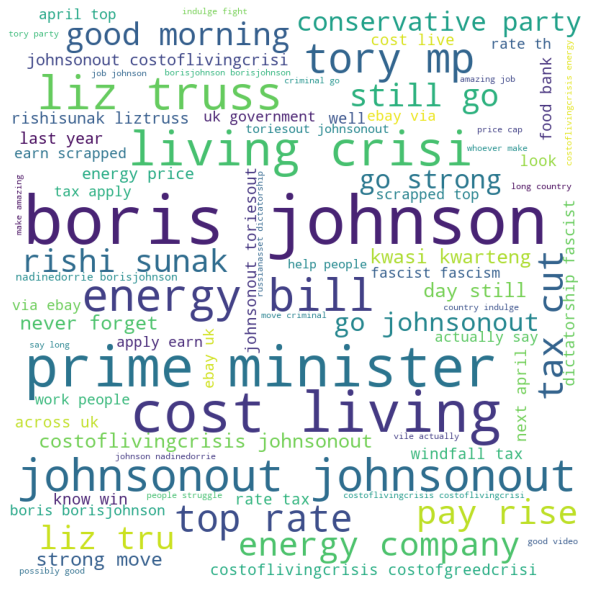

In [ ]:

comment_words = ''
stopwords = set(STOPWORDS)
 
# iterate through the csv file
for val in tweets['Cleaned_tweets']:
     
    # typecaste each val to string
    val = str(val)
 
    # split the value
    tokens = val.split()
     
    # Converts each token into lowercase
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()
     
    comment_words += " ".join(tokens)+" "
 
wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = stopwords,
                min_font_size = 10).generate(comment_words)
 
# plot the WordCloud image                      
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
plt.savefig('MSc_Wordcloud.png')
plt.show()